In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.3.0


In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJOM0I7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJOM0I7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJOM0I7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

#GRU

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 16s 21ms/step - loss: 0.5147 - accuracy: 0.7216 - val_loss: 0.3791 - val_accuracy: 0.8308
Epoch 2/50
782/782 [==============================] - 16s 20ms/step - loss: 0.3012 - accuracy: 0.8771 - val_loss: 0.3509 - val_accuracy: 0.8464
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 0.2373 - accuracy: 0.9076 - val_loss: 0.3804 - val_accuracy: 0.8406
Epoch 4/50
782/782 [==============================] - 16s 20ms/step - loss: 0.1776 - accuracy: 0.9350 - val_loss: 0.4284 - val_accuracy: 0.8333
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 0.1270 - accuracy: 0.9556 - val_loss: 0.4670 - val_accuracy: 0.8193
Epoch 6/50
782/782 [==============================] - 16s 20ms/step - loss: 0.0843 - accuracy: 0.9716 - val_loss: 0.6687 - val_accuracy: 0.8269
Epoch 7/50
782/782 [==============================] - 16s 21ms/step - loss: 0.0613 - accuracy: 0.9796 - val_loss: 0.6932 - val_accuracy:

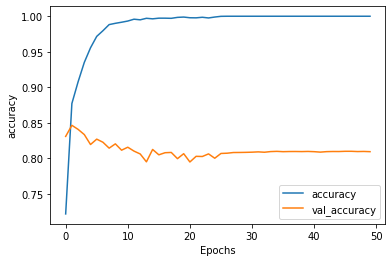

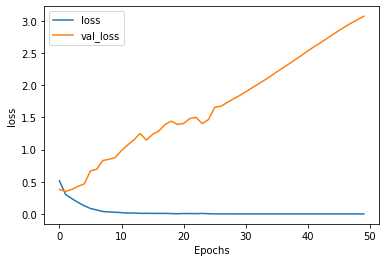

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#LSTM

In [ ]:
# Model Definition with LSTM
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history2 = model2.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 16s 21ms/step - loss: 0.6271 - accuracy: 0.6413 - val_loss: 0.5501 - val_accuracy: 0.7186
Epoch 2/50
782/782 [==============================] - 16s 20ms/step - loss: 0.5666 - accuracy: 0.7155 - val_loss: 0.5344 - val_accuracy: 0.7377
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 0.5306 - accuracy: 0.7430 - val_loss: 0.4421 - val_accuracy: 0.8061
Epoch 4/50
782/782 [==============================] - 16s 20ms/step - loss: 0.3686 - accuracy: 0.8480 - val_loss: 0.3922 - val_accuracy: 0.8318
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 0.2886 - accuracy: 0.8882 - val_loss: 0.3701 - val_accuracy: 0.8368
Epoch 6/50
782/782 [==============================] - 16s 20ms/step - loss: 0.2413 - accuracy: 0.9098 - val_loss: 0.3820 - val_accuracy: 0.8361
Epoch 7/50
782/782 [==============================] - 16s 21ms/step - loss: 0.2086 - accuracy: 0.9249 - val_loss: 0.4498 - val_accuracy:

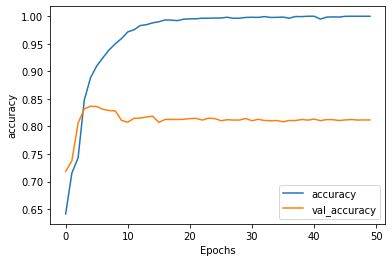

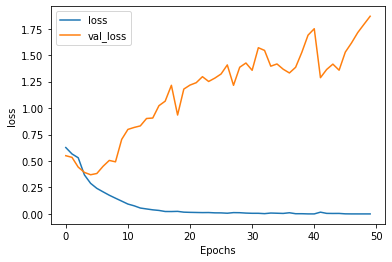

In [ ]:
plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

# Conv1D

In [ ]:
# Model Definition with Conv1D
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history3 = model3.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4404 - accuracy: 0.7851 - val_loss: 0.3532 - val_accuracy: 0.8463
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 0.2795 - accuracy: 0.8873 - val_loss: 0.3517 - val_accuracy: 0.8478
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2286 - accuracy: 0.9102 - val_loss: 0.3762 - val_accuracy: 0.8415
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.1894 - accuracy: 0.9264 - val_loss: 0.4172 - val_accuracy: 0.8335
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1549 - accuracy: 0.9455 - val_loss: 0.4621 - val_accuracy: 0.8246
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.1263 - accuracy: 0.9583 - val_loss: 0.5360 - val_accuracy: 0.8212
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.1013 - accuracy: 0.9670 - val_loss: 0.6180 - val_accuracy: 0.8121
Epoch 

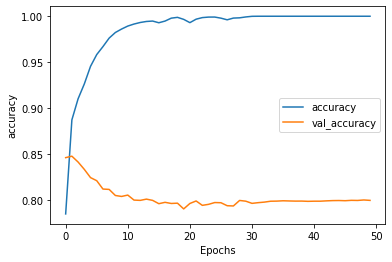

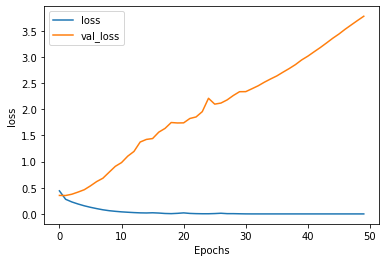

In [ ]:
plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')

# Simple Embedding + Dense


In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 20
history4 = model4.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 5s 7ms/step - loss: 0.4924 - accuracy: 0.7435 - val_loss: 0.3467 - val_accuracy: 0.8467
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2310 - accuracy: 0.9095 - val_loss: 0.3796 - val_accuracy: 0.8328
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0808 - accuracy: 0.9813 - val_loss: 0.4622 - val_accuracy: 0.8232
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0181 - accuracy: 0.9978 - val_loss: 0.5375 - val_accuracy: 0.8214
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.5897 - val_accuracy: 0.8238
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6388 - val_accuracy: 0.8240
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 7.7573e-04 - accuracy: 1.0000 - val_loss: 0.6762 - val_accuracy: 0.8254
Ep

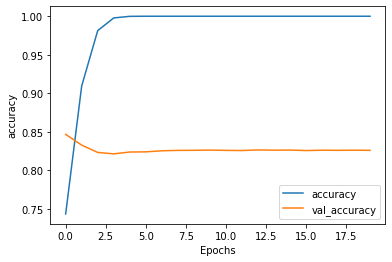

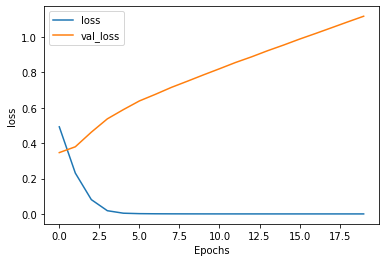

In [ ]:
plot_graphs(history4, 'accuracy')
plot_graphs(history4, 'loss')